In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
wine = pd.read_csv("Datasets/winequality-red4_7.csv")

X = wine[["alcohol", "pH"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y ==4:
        return 0
    else:
        return 1
         
# Create target value array
y = wine["quality"].map(make_labels).to_numpy()



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")
 
  


Tree Classification Report
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        25
           1       0.86      0.96      0.91        76

    accuracy                           0.85       101
   macro avg       0.84      0.74      0.77       101
weighted avg       0.85      0.85      0.84       101
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.89      0.32      0.47        25
           1       0.82      0.99      0.89        76

    accuracy                           0.82       101
   macro avg       0.85      0.65      0.68       101
weighted avg       0.83      0.82      0.79       101
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.32      0.47        25
           1       0.82      0.99      0.89        76

    accuracy                           0.82       101
   macro avg       0.85      0.65     

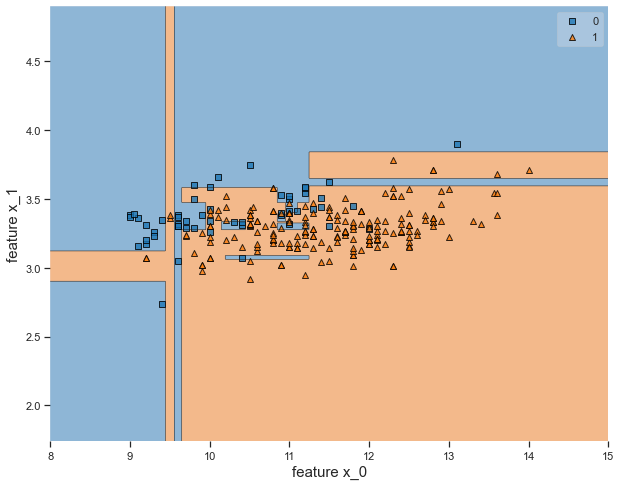

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


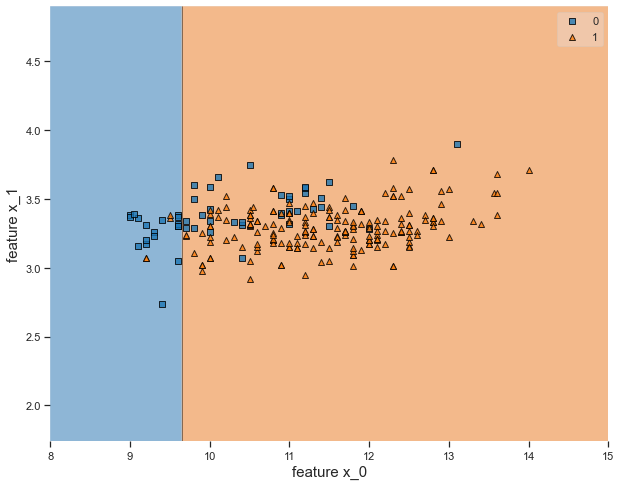

In [9]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

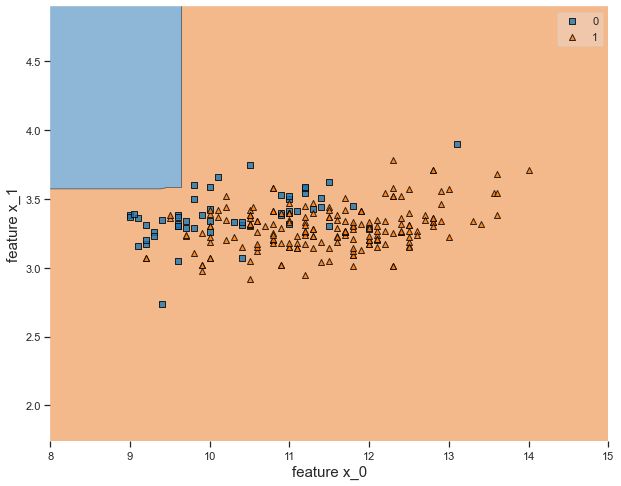

In [10]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

X = wine[["alcohol", "pH", "volatile_acidity", "citric_acid"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.91      0.96      0.93        73

    accuracy                           0.90       101
   macro avg       0.89      0.85      0.87       101
weighted avg       0.90      0.90      0.90       101
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.91      0.36      0.51        28
           1       0.80      0.99      0.88        73

    accuracy                           0.81       101
   macro avg       0.85      0.67      0.70       101
weighted avg       0.83      0.81      0.78       101
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.36      0.51        28
           1       0.80      0.99      0.88        73

    accuracy                           0.81       101
   macro avg       0.85      0.67     

In [13]:
names = ["alcohol", "pH", "volatile_acidity", "citric_acid"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

alcohol 0.204
pH 0.056
volatile_acidity 0.45
citric_acid 0.29
